# Data Cleaning and Exploration

In this jupyter notebook, we aim to explore the dataset provided and to identify any changes that needs to be made to the data to ensure that the information provided is reliable, accurate and usable. 

We will first convert the columns to the correct datatypes required for data exploration.

After which, we will check for any missing values and should there be any missing values, we will replace/ remove theses missing values accordingly based on the situation. 

We will also explore the continuous and cateogical variables individually, to ensure that there are no values that do not make any logical sense. At last, we will then export the dataset as a cleaned usable csv file for our machine learning models.

In [1]:
import pandas as pd
import csv
import numpy as np

marketing_data = pd.read_csv('marketing_data_raw.csv')
pd.set_option('display.max_rows', marketing_data.shape[0]+1)
pd.set_option('display.max_columns', None)

In [2]:
marketing_data.head()

ID  Age  Gender  ChildrenHome   Education Marital_Status   Income  \
0   1   52       1             0  Graduation       Divorced  84835.0   
1   2   61       1             0  Graduation         Single  57091.0   
2   3   64       1             1  Graduation        Married  67267.0   
3   4   55       0             2  Graduation       Together  32474.0   
4   5   33       1             1  Graduation         Single  21474.0   

  DeviceType  SubscriptionPaymentMethod  TimeSpentOnStraitsTimes  \
0      Phone                          1                       36   
1      Phone                          0                       25   
2   Computer                          0                       28   
3   Computer                          0                       13   
4      Phone                          0                       41   

   NumOfTimesAppOpened  NumAdsViewed  NumArticlesFashion  \
0                    4             4                   2   
1                    3             7                   0   
2                    5             3                   1   
3                    1             1                   5   
4                    7             3                   4   

   NumArticlesTechnology  NumArticlesHealth  NumArticlesSports  \
0                      5                  4                  8   
1                      5                  1                  4   
2                      0                  4                  1   
3                      6                  1                  2   
4                      1                  4                  5   

   NumArticlesWorldEvents  Response  
0                       6         1  
1                      13         1  
2                       7         0  
3                       4         0  
4                       5         1

In [3]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2741 non-null   int64  
 1   Age                        2741 non-null   int64  
 2   Gender                     2741 non-null   int64  
 3   ChildrenHome               2741 non-null   int64  
 4   Education                  2741 non-null   object 
 5   Marital_Status             2741 non-null   object 
 6   Income                     2717 non-null   float64
 7   DeviceType                 2741 non-null   object 
 8   SubscriptionPaymentMethod  2741 non-null   int64  
 9   TimeSpentOnStraitsTimes    2741 non-null   int64  
 10  NumOfTimesAppOpened        2741 non-null   int64  
 11  NumAdsViewed               2741 non-null   int64  
 12  NumArticlesFashion         2741 non-null   int64  
 13  NumArticlesTechnology      2741 non-null   int64

We first convert the columns to the correct datatype that is required for data exploration

In [4]:
marketing_data['Gender'] = pd.Categorical(marketing_data.Gender)
marketing_data['SubscriptionPaymentMethod'] = pd.Categorical(marketing_data.SubscriptionPaymentMethod)
marketing_data['Response'] = pd.Categorical(marketing_data.Response)
marketing_data['Education'] = pd.Categorical(marketing_data.Education)
marketing_data['Marital_Status'] = pd.Categorical(marketing_data.Marital_Status)
marketing_data['DeviceType'] = pd.Categorical(marketing_data.DeviceType)

In [5]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID                         2741 non-null   int64   
 1   Age                        2741 non-null   int64   
 2   Gender                     2741 non-null   category
 3   ChildrenHome               2741 non-null   int64   
 4   Education                  2741 non-null   category
 5   Marital_Status             2741 non-null   category
 6   Income                     2717 non-null   float64 
 7   DeviceType                 2741 non-null   category
 8   SubscriptionPaymentMethod  2741 non-null   category
 9   TimeSpentOnStraitsTimes    2741 non-null   int64   
 10  NumOfTimesAppOpened        2741 non-null   int64   
 11  NumAdsViewed               2741 non-null   int64   
 12  NumArticlesFashion         2741 non-null   int64   
 13  NumArticlesTechnology      2741 n

## Handling the Categorical Variables 

### Education

In [6]:
marketing_data["Education"].value_counts()

Graduation       1286
PhD               486
Master            370
Undergraduate     342
2n Cycle          203
Basic              54
Name: Education, dtype: int64

In [7]:
marketing_data.replace(to_replace= "2n Cycle", value = "2ndCycle", inplace=True)

In [8]:
marketing_data.replace(to_replace= "Graduation", value = "Graduate", inplace=True)

In [9]:
marketing_data["Education"].value_counts()

Graduate         1286
PhD               486
Master            370
Undergraduate     342
2ndCycle          203
Basic              54
Name: Education, dtype: int64

### MaritalStatus

In [10]:
marketing_data = marketing_data.rename(columns={'Marital_Status': 'MaritalStatus'})

In [11]:
marketing_data["MaritalStatus"].value_counts()

Married     974
Single      871
Together    580
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: MaritalStatus, dtype: int64

In [12]:
marketing_data.replace(to_replace= "Together", value = "Married", inplace=True)

In [13]:
marketing_data.replace(to_replace= "Alone", value = "Single", inplace=True)

In [14]:
marketing_data.loc[(marketing_data["MaritalStatus"] == "YOLO") | (marketing_data["MaritalStatus"] == "Absurd")]

ID  Age Gender  ChildrenHome Education MaritalStatus   Income  \
103    104   49      1             1       PhD          YOLO  48432.0   
104    105   49      1             1       PhD          YOLO  48432.0   
1068  1069   65      0             0    Master        Absurd  65487.0   
1339  1340   29      1             0  Graduate        Absurd  79244.0   

     DeviceType SubscriptionPaymentMethod  TimeSpentOnStraitsTimes  \
103    Computer                         1                       14   
104       Phone                         0                       15   
1068     Tablet                         1                       21   
1339   computer                         0                       33   

      NumOfTimesAppOpened  NumAdsViewed  NumArticlesFashion  \
103                     1             7                   3   
104                     2             7                   4   
1068                    3             3                   7   
1339                    5             4                   6   

      NumArticlesTechnology  NumArticlesHealth  NumArticlesSports  \
103                       2                  3                  0   
104                       3                  2                  7   
1068                      3                  0                  1   
1339                      0                  2                  8   

      NumArticlesWorldEvents Response  
103                        1        0  
104                        5        1  
1068                      10        0  
1339                      10        1

Here we can observe that for the "YOLO" marital status, both cases have children at home, thus it can be safe to assume that both individuals are married. On the other hand, for the "Absurd" cases, they do not have children, thus it we will convert these 2 individuals to have the marital status of 'single'

In [15]:
marketing_data.replace(to_replace= "Absurd", value = "Single", inplace=True)

In [16]:
marketing_data.replace(to_replace= "YOLO", value = "Married", inplace=True)

In [17]:
marketing_data["MaritalStatus"].value_counts()

Married     1556
Single       876
Divorced     232
Widow         77
Name: MaritalStatus, dtype: int64

### Other categorical variables

In [18]:
marketing_data["Gender"].value_counts()

1    1436
0    1305
Name: Gender, dtype: int64

In [19]:
marketing_data["SubscriptionPaymentMethod"].value_counts()

1    930
0    918
2    893
Name: SubscriptionPaymentMethod, dtype: int64

In [20]:
marketing_data["DeviceType"].value_counts()

Computer    902
Laptop      630
Tablet      613
Phone       595
computer      1
Name: DeviceType, dtype: int64

In [21]:
marketing_data.replace(to_replace= "computer", value = "Computer", inplace=True)

In [22]:
marketing_data["DeviceType"].value_counts()

Computer    903
Laptop      630
Tablet      613
Phone       595
Name: DeviceType, dtype: int64

In [23]:
marketing_data["Response"].value_counts()

0    2140
1     601
Name: Response, dtype: int64

## Handling the Continuous Variables 

In [24]:
marketing_data.describe()

ID          Age  ChildrenHome         Income  \
count  2741.000000  2741.000000   2741.000000    2717.000000   
mean   1371.000000    47.622036      0.836921   47895.829223   
std     791.402868    16.114762      0.774621   25505.408132   
min       1.000000    16.000000      0.000000    1730.000000   
25%     686.000000    36.000000      0.000000   29298.000000   
50%    1371.000000    49.000000      1.000000   46891.000000   
75%    2056.000000    60.000000      1.000000   64866.000000   
max    2741.000000   129.000000      3.000000  666666.000000   

       TimeSpentOnStraitsTimes  NumOfTimesAppOpened  NumAdsViewed  \
count              2741.000000          2741.000000   2741.000000   
mean                 19.036118             2.869026      5.380518   
std                  10.385023             1.435471      4.751800   
min                   3.000000             1.000000      0.000000   
25%                  11.000000             2.000000      2.000000   
50%                  18.000000             3.000000      4.000000   
75%                  26.000000             4.000000      7.000000   
max                  50.000000             7.000000     27.000000   

       NumArticlesFashion  NumArticlesTechnology  NumArticlesHealth  \
count         2741.000000            2741.000000        2741.000000   
mean             2.972273               2.835826           2.872309   
std              2.496852               2.378594           2.543010   
min              0.000000               0.000000           0.000000   
25%              1.000000               1.000000           1.000000   
50%              2.000000               2.000000           2.000000   
75%              5.000000               4.000000           4.000000   
max             12.000000              11.000000          14.000000   

       NumArticlesSports  NumArticlesWorldEvents  
count        2741.000000             2741.000000  
mean            2.701204                5.026997  
std             2.248299                4.115309  
min             0.000000                0.000000  
25%             1.000000                2.000000  
50%             2.000000                4.000000  
75%             4.000000                8.000000  
max            10.000000               17.000000

### Age

We can observe from the above "description" of the data, we can observe that one of the column "age" is in need of more data exploration. This is because, the max age of an individual is this dataset is 129 which is highely unlikely as the largest age ever recorded in history is 122. 

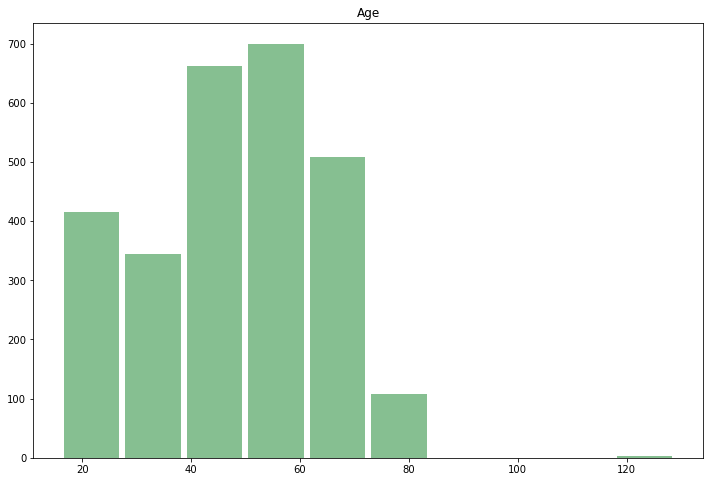

In [25]:
ax = marketing_data.hist(column='Age', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [26]:
marketing_data.loc[marketing_data["Age"]> 100]

ID  Age Gender  ChildrenHome Education MaritalStatus   Income  \
513    514  129      0             1  2ndCycle        Single  60182.0   
827    828  123      1             0       PhD       Married  83532.0   
2233  2234  122      0             1  2ndCycle      Divorced  36640.0   

     DeviceType SubscriptionPaymentMethod  TimeSpentOnStraitsTimes  \
513    Computer                         0                       13   
827       Phone                         2                        5   
2233   Computer                         0                       18   

      NumOfTimesAppOpened  NumAdsViewed  NumArticlesFashion  \
513                     3             1                   2   
827                     1             4                   0   
2233                    3             2                   0   

      NumArticlesTechnology  NumArticlesHealth  NumArticlesSports  \
513                       2                  2                  6   
827                       1                  1                  5   
2233                      5                  2                  5   

      NumArticlesWorldEvents Response  
513                        4        0  
827                        5        0  
2233                       3        0

Here we observe that there are 3 individuals that are above the age 100. For the individual who is age 129, we note that she is single. Thus, we assume that there could be a mistype of the age '129' instead of '29'. 

For the individual who is age 123. He is married with a PhD degree. As such to properly account for the age, we will find what is the average age of a PhD individual and replace the current age value with the average value found.

Lastly, for the individual who is age 122. She is divorced with a child. For this, we will find what is the average age of a divorced individual and replace the age with the average value found. 

In [27]:
marketing_data.replace(to_replace= 129, value = 29, inplace=True)

In [28]:
marketing_data[marketing_data["Education"] == "PhD"]["Age"].mean()

55.95679012345679

In [29]:
marketing_data[marketing_data["MaritalStatus"] == "Divorced"]["Age"].mean()

55.724137931034484

In [30]:
marketing_data.replace(to_replace= 123, value = 55, inplace=True)
marketing_data.replace(to_replace= 122, value = 55, inplace=True)

In [31]:
marketing_data.describe()

ID          Age  ChildrenHome         Income  \
count  2741.000000  2741.000000   2741.000000    2717.000000   
mean   1370.914265    47.536301      0.836921   47895.829223   
std     791.542262    15.916498      0.774621   25505.408132   
min       1.000000    16.000000      0.000000    1730.000000   
25%     686.000000    36.000000      0.000000   29298.000000   
50%    1371.000000    49.000000      1.000000   46891.000000   
75%    2056.000000    60.000000      1.000000   64866.000000   
max    2741.000000    82.000000      3.000000  666666.000000   

       TimeSpentOnStraitsTimes  NumOfTimesAppOpened  NumAdsViewed  \
count              2741.000000          2741.000000   2741.000000   
mean                 19.036118             2.869026      5.380518   
std                  10.385023             1.435471      4.751800   
min                   3.000000             1.000000      0.000000   
25%                  11.000000             2.000000      2.000000   
50%                  18.000000             3.000000      4.000000   
75%                  26.000000             4.000000      7.000000   
max                  50.000000             7.000000     27.000000   

       NumArticlesFashion  NumArticlesTechnology  NumArticlesHealth  \
count         2741.000000            2741.000000        2741.000000   
mean             2.972273               2.835826           2.872309   
std              2.496852               2.378594           2.543010   
min              0.000000               0.000000           0.000000   
25%              1.000000               1.000000           1.000000   
50%              2.000000               2.000000           2.000000   
75%              5.000000               4.000000           4.000000   
max             12.000000              11.000000          14.000000   

       NumArticlesSports  NumArticlesWorldEvents  
count        2741.000000             2741.000000  
mean            2.701204                5.026997  
std             2.248299                4.115309  
min             0.000000                0.000000  
25%             1.000000                2.000000  
50%             2.000000                4.000000  
75%             4.000000                8.000000  
max            10.000000               17.000000

### Income 

<AxesSubplot:title={'center':'Income of individuals'}>

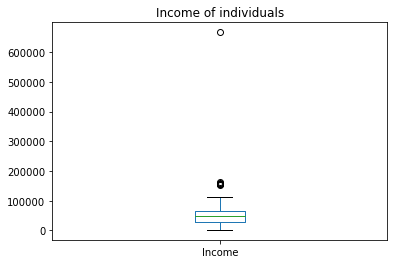

In [32]:
marketing_data['Income'].plot(kind='box', title='Income of individuals')

In [33]:
marketing_data.loc[(marketing_data["Income"] > 300000)]

ID  Age Gender  ChildrenHome Education MaritalStatus    Income  \
527  528   45      1             1  Graduate       Married  666666.0   

    DeviceType SubscriptionPaymentMethod  TimeSpentOnStraitsTimes  \
527     Laptop                         2                       28   

     NumOfTimesAppOpened  NumAdsViewed  NumArticlesFashion  \
527                    2             3                   1   

     NumArticlesTechnology  NumArticlesHealth  NumArticlesSports  \
527                      2                  1                  6   

     NumArticlesWorldEvents Response  
527                       0        0

We will replace the income with the median income of a married couple who is graduate

In [34]:
marketing_data[(marketing_data["MaritalStatus"] == "Married") & (marketing_data["Education"] == "Graduate")]["Income"].median()

51424.5

In [35]:
marketing_data.replace(to_replace= 666666, value = 51424, inplace=True)

In [36]:
marketing_data.describe()

ID          Age  ChildrenHome        Income  \
count  2741.000000  2741.000000   2741.000000    2717.00000   
mean   1370.914265    47.536301      0.836921   47669.38756   
std     791.542262    15.916498      0.774621   22572.29263   
min       1.000000    16.000000      0.000000    1730.00000   
25%     686.000000    36.000000      0.000000   29298.00000   
50%    1371.000000    49.000000      1.000000   46891.00000   
75%    2056.000000    60.000000      1.000000   64857.00000   
max    2741.000000    82.000000      3.000000  162397.00000   

       TimeSpentOnStraitsTimes  NumOfTimesAppOpened  NumAdsViewed  \
count              2741.000000          2741.000000   2741.000000   
mean                 19.036118             2.869026      5.380518   
std                  10.385023             1.435471      4.751800   
min                   3.000000             1.000000      0.000000   
25%                  11.000000             2.000000      2.000000   
50%                  18.000000             3.000000      4.000000   
75%                  26.000000             4.000000      7.000000   
max                  50.000000             7.000000     27.000000   

       NumArticlesFashion  NumArticlesTechnology  NumArticlesHealth  \
count         2741.000000            2741.000000        2741.000000   
mean             2.972273               2.835826           2.872309   
std              2.496852               2.378594           2.543010   
min              0.000000               0.000000           0.000000   
25%              1.000000               1.000000           1.000000   
50%              2.000000               2.000000           2.000000   
75%              5.000000               4.000000           4.000000   
max             12.000000              11.000000          14.000000   

       NumArticlesSports  NumArticlesWorldEvents  
count        2741.000000             2741.000000  
mean            2.701204                5.026997  
std             2.248299                4.115309  
min             0.000000                0.000000  
25%             1.000000                2.000000  
50%             2.000000                4.000000  
75%             4.000000                8.000000  
max            10.000000               17.000000

# Dealing with Missing Values


In [37]:
marketing_data.isnull().sum().sum()

24

In [38]:
nan_values = marketing_data[marketing_data.isnull().any(axis=1)]

In [39]:
nan_values

ID  Age Gender  ChildrenHome Education MaritalStatus  Income  \
134    135   65      0             3       PhD       Married     NaN   
262    263   39      0             1  Graduate       Married     NaN   
394    395   50      0             1       PhD       Married     NaN   
449    450   36      0             1  Graduate        Single     NaN   
525    526   61      1             1       PhD       Married     NaN   
590    591   49      1             1  2ndCycle       Married     NaN   
899    900   52      1             1    Master       Married     NaN   
997    998   65      1             2  Graduate        Single     NaN   
1096  1097   58      1             2  2ndCycle        Single     NaN   
1185  1186   53      1             2    Master       Married     NaN   
1213  1214   44      1             0  2ndCycle       Married     NaN   
1312  1313   40      1             1  Graduate        Single     NaN   
1515  1516   52      0             3  Graduate        Single     NaN   
1558  1559   33      0             0  Graduate       Married     NaN   
1693  1694   79      0             0    Master         Widow     NaN   
1804  1805   63      0             0       PhD        Single     NaN   
1858  1859   41      0             1       PhD        Single     NaN   
1863  1864   51      0             2  Graduate       Married     NaN   
1880  1881   68      0             1    Master       Married     NaN   
1967  1968   49      1             0    Master       Married     NaN   
1983  1984   64      0             2  Graduate       Married     NaN   
2139  2140   67      0             1  Graduate        Single     NaN   
2165  2166   71      1             3  Graduate        Single     NaN   
2170  2171   59      1             1  Graduate       Married     NaN   

     DeviceType SubscriptionPaymentMethod  TimeSpentOnStraitsTimes  \
134      Laptop                         2                       10   
262       Phone                         2                       16   
394      Tablet                         0                       10   
449      Tablet                         2                       26   
525      Laptop                         2                        4   
590      Laptop                         0                       15   
899       Phone                         1                       25   
997       Phone                         2                       25   
1096      Phone                         2                       21   
1185   Computer                         1                       18   
1213   Computer                         0                       27   
1312     Laptop                         0                        5   
1515   Computer                         0                       18   
1558   Computer                         2                       28   
1693      Phone                         2                       21   
1804   Computer                         1                       17   
1858     Laptop                         0                       14   
1863   Computer                         0                       16   
1880   Computer                         2                       24   
1967     Laptop                         1                       30   
1983     Laptop                         0                       22   
2139     Laptop                         2                       29   
2165   Computer                         1                       18   
2170      Phone                         1                        8   

      NumOfTimesAppOpened  NumAdsViewed  NumArticlesFashion  \
134                     4             7                   1   
262                     1             1                   5   
394                     3             1                   5   
449                     4            27                   2   
525                     1             6                   9   
590                     2             3                   0   
899            

Here we aim to replace the NaN incomes with the median income values based on its Education level

In [40]:
group = nan_values.groupby(["Education"]).size()
group

Education
2ndCycle          3
Basic             0
Graduate         11
Master            5
PhD               5
Undergraduate     0
dtype: int64

In [41]:
education_list = ["2ndCycle", "Graduate", "Master", "PhD"]

for education in education_list:
    print("Median income of individual with Education", education)
    median_income = marketing_data[(marketing_data["Education"] == education)]["Income"].median()
    print(median_income)
    IDs = nan_values[(nan_values["Education"] == education)]["ID"].tolist()
    print(IDs)
    for index in IDs:
        marketing_data.loc[(marketing_data.ID == index),"Income"] = median_income
    print()

Median income of individual with Education 2ndCycle
46805.0
[591, 1097, 1214]

Median income of individual with Education Graduate
51747.0
[263, 450, 998, 1313, 1516, 1559, 1864, 1984, 2140, 2166, 2171]

Median income of individual with Education Master
50943.0
[900, 1186, 1694, 1881, 1968]

Median income of individual with Education PhD
55212.0
[135, 395, 526, 1805, 1859]



In [42]:
marketing_data.isnull().sum().sum()

0

# Exporting data

In [43]:
marketing_data

ID  Age Gender  ChildrenHome      Education MaritalStatus    Income  \
0        1   52      1             0       Graduate      Divorced   84835.0   
1        2   61      1             0       Graduate        Single   57091.0   
2        3   64      1             1       Graduate       Married   67267.0   
3        4   55      0             2       Graduate       Married   32474.0   
4        5   33      1             1       Graduate        Single   21474.0   
5        6   64      1             0            PhD        Single   71691.0   
6        7   68      1             0       2ndCycle       Married   63564.0   
7        8   55      0             1       Graduate       Married   44931.0   
8        9   68      0             1            PhD       Married   65324.0   
9       10   68      0             1            PhD       Married   65324.0   
10      11   75      0             0       2ndCycle       Married   81044.0   
11      12   43      0             1         Master       Married   62499.0   
12      13   63      0             0            PhD         Widow   67786.0   
13      14   41      0             0       Graduate       Married   26872.0   
14      15   53      1             1       Graduate       Married    4428.0   
15      16   45      0             2       Graduate       Married   54809.0   
16      17   45      0             2       Graduate       Married   54809.0   
17      18   64      1             1            PhD      Divorced   32173.0   
18      19   62      1             1       2ndCycle        Single   47823.0   
19      20   64      1             3         Master        Single   30523.0   
20      21   68      0             1         Master       Married   36634.0   
21      22   56      1             1         Master        Single   43456.0   
22      23   43      1             1         Master       Married   40662.0   
23      24   46      0             1            PhD       Married   49544.0   
24      25   53      1             1       Graduate        Single   57731.0   
25      26   57      0             1         Master        Single   33168.0   
26      27   66      1             2       Graduate       Married   54450.0   
27      28   66      0             2       Graduate       Married   54450.0   
28      29   66      0             2            PhD         Widow   35340.0   
29      30   47      0             0       Graduate        Single   73170.0   
30      31   51      0             2            PhD      Divorced   65808.0   
31      32   36      1             0       Graduate       Married   79529.0   
32      33   50      0             3            PhD       Married   34578.0   
33      34   48      0             1            PhD       Married   46374.0   
34      35   32      0             0       Graduate       Married   18351.0   
35      36   35      0             0            PhD        Single   95169.0   
36      37   38      0             0       2ndCycle       Married   65370.0   
37      38   62      0             0         Master      Divorced   39228.0   
38      39   61      1             0            PhD        Single   84865.0   
39      40   54      0             1       Graduate       Married   61314.0   
40      41   50      0             1       Graduate        Single   21359.0   
41      42   67      0             1            PhD       Married   66465.0   
42      43   39      0             0       2ndCycle        Single   81698.0   
43      44   36      1             1       Graduate        Single   39146.0   
44      45   52      0             2       2ndCycle      Divorced   25959.0   
45      46   61      0             0       Graduate       Married   64260.0   
46      47   49      0             1       Graduate       Married   32300.0   
47      48   57      0             1         Master       Married   74806.0   
48      49   52      1             1       Graduate      Divorced   72967.0   
49      50   62      1             1       Graduate       

In [44]:
from sklearn.utils import shuffle
marketing_data_cleaned = shuffle(marketing_data)
marketing_data_cleaned

ID  Age Gender  ChildrenHome      Education MaritalStatus    Income  \
284    285   56      0             2         Master      Divorced   29435.0   
1788  1789   68      0             0       Graduate      Divorced   76773.0   
1946  1947   57      0             2       Graduate       Married   44393.0   
2685  2686   18      1             0  Undergraduate        Single   14425.0   
1508  1509   37      1             1            PhD       Married   64355.0   
2331  2332   28      0             1       Graduate       Married   47574.0   
1982  1983   65      0             0       Graduate       Married   78618.0   
939    940   36      1             1         Master       Married   27161.0   
653    654   38      0             0            PhD        Single   82733.0   
1497  1498   36      1             1            PhD       Married   34320.0   
1873  1874   53      1             0            PhD        Single   66582.0   
1398  1399   65      1             1       Graduate       Married   73803.0   
2005  2006   48      0             1            PhD       Married   78128.0   
2285  2286   18      0             0  Undergraduate        Single   24692.0   
2462  2463   21      1             0  Undergraduate        Single   28943.0   
2041  2042   44      1             1            PhD       Married   27683.0   
2265  2266   18      0             0  Undergraduate        Single   22651.0   
1665  1666   48      1             1            PhD       Married   65640.0   
1527  1528   38      1             1       Graduate        Single   52413.0   
2475  2476   23      0             0  Undergraduate        Single   17353.0   
2161  2162   38      0             1       Graduate       Married   31761.0   
1344  1345   46      1             1       Graduate       Married   29478.0   
1529  1530   60      0             1       Graduate        Single   76624.0   
2509  2510   30      1             1       Graduate       Married   53171.0   
943    944   38      1             1            PhD        Single   39684.0   
2219  2220   42      1             0       Graduate      Divorced   81702.0   
2080  2081   66      1             1         Master       Married   52973.0   
2574  2575   18      1             0  Undergraduate        Single   25071.0   
2173  2174   36      0             1       2ndCycle       Married    7500.0   
2154  2155   34      1             0       Graduate        Single   68655.0   
1208  1209   79      0             0            PhD      Divorced   48948.0   
2719  2720   28      0             2       Graduate       Married   51031.0   
2045  2046   38      1             0       Graduate       Married   90000.0   
571    572   63      1             1         Master       Married   34242.0   
1596  1597   58      1             2            PhD      Divorced   64140.0   
931    932   47      1             1            PhD       Married   69283.0   
2393  2394   17      1             0  Undergraduate        Single   11320.0   
1085  1086   34      1             0       Graduate       Married   68487.0   
1695  1696   40      0             1       Graduate       Married   50272.0   
811    812   54      1             1       Graduate       Married   56534.0   
1593  1594   53      0             1       Graduate       Married   23228.0   
671    672   31      1             0         Master        Single   90638.0   
1722  1723   36      0             1       Graduate       Married   32880.0   
15      16   45      0             2       Graduate       Married   54809.0   
1729  1730   55      1             1       Graduate        Single   52074.0   
722    723   43      1             1       Graduate       Married   77568.0   
86      87   35      1             0       2ndCycle        Single   23830.0   
344    345   73      1             1         Master         Widow   51529.0   
1693  1694   79      0             0         Master         Widow   50943.0   
281    282   72      1             2            PhD      D

In [45]:
marketing_data_cleaned = marketing_data_cleaned.drop(columns="ID")
marketing_data_cleaned.reset_index(drop=True, inplace=True)
marketing_data_cleaned.head()

Age Gender  ChildrenHome      Education MaritalStatus   Income DeviceType  \
0   56      0             2         Master      Divorced  29435.0     Tablet   
1   68      0             0       Graduate      Divorced  76773.0   Computer   
2   57      0             2       Graduate       Married  44393.0     Tablet   
3   18      1             0  Undergraduate        Single  14425.0      Phone   
4   37      1             1            PhD       Married  64355.0   Computer   

  SubscriptionPaymentMethod  TimeSpentOnStraitsTimes  NumOfTimesAppOpened  \
0                         1                       42                    5   
1                         1                       16                    1   
2                         2                        5                    2   
3                         1                        9                    1   
4                         2                       25                    5   

   NumAdsViewed  NumArticlesFashion  NumArticlesTechnology  NumArticlesHealth  \
0             3                  11                      0                  0   
1             2                   2                      0                  1   
2             1                   0                      1                  4   
3             8                   5                      6                  7   
4             4                   0                      0                  4   

   NumArticlesSports  NumArticlesWorldEvents Response  
0                  3                      12        1  
1                  4                      16        0  
2                  2                       0        0  
3                  2                       3        0  
4                  0                       2        0

In [46]:
marketing_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2741 non-null   int64   
 1   Gender                     2741 non-null   category
 2   ChildrenHome               2741 non-null   int64   
 3   Education                  2741 non-null   category
 4   MaritalStatus              2741 non-null   category
 5   Income                     2741 non-null   float64 
 6   DeviceType                 2741 non-null   category
 7   SubscriptionPaymentMethod  2741 non-null   category
 8   TimeSpentOnStraitsTimes    2741 non-null   int64   
 9   NumOfTimesAppOpened        2741 non-null   int64   
 10  NumAdsViewed               2741 non-null   int64   
 11  NumArticlesFashion         2741 non-null   int64   
 12  NumArticlesTechnology      2741 non-null   int64   
 13  NumArticlesHealth          2741 n

In [47]:
marketing_data_cleaned.describe()

Age  ChildrenHome         Income  TimeSpentOnStraitsTimes  \
count  2741.000000   2741.000000    2741.000000              2741.000000   
mean     47.536301      0.836921   47704.535936                19.036118   
std      15.916498      0.774621   22477.438719                10.385023   
min      16.000000      0.000000    1730.000000                 3.000000   
25%      36.000000      0.000000   29385.000000                11.000000   
50%      49.000000      1.000000   47009.000000                18.000000   
75%      60.000000      1.000000   64722.000000                26.000000   
max      82.000000      3.000000  162397.000000                50.000000   

       NumOfTimesAppOpened  NumAdsViewed  NumArticlesFashion  \
count          2741.000000   2741.000000         2741.000000   
mean              2.869026      5.380518            2.972273   
std               1.435471      4.751800            2.496852   
min               1.000000      0.000000            0.000000   
25%               2.000000      2.000000            1.000000   
50%               3.000000      4.000000            2.000000   
75%               4.000000      7.000000            5.000000   
max               7.000000     27.000000           12.000000   

       NumArticlesTechnology  NumArticlesHealth  NumArticlesSports  \
count            2741.000000        2741.000000        2741.000000   
mean                2.835826           2.872309           2.701204   
std                 2.378594           2.543010           2.248299   
min                 0.000000           0.000000           0.000000   
25%                 1.000000           1.000000           1.000000   
50%                 2.000000           2.000000           2.000000   
75%                 4.000000           4.000000           4.000000   
max                11.000000          14.000000          10.000000   

       NumArticlesWorldEvents  
count             2741.000000  
mean                 5.026997  
std                  4.115309  
min                  0.000000  
25%                  2.000000  
50%                  4.000000  
75%                  8.000000  
max                 17.000000

In [48]:
marketing_data_cleaned.to_csv('marketing_data_cleaned.csv', index=False)